The following steps here can be used to implement CFAR in the next MATLAB exercise.

T: Number of Training Cells

G: Number of Guard Cells

N: Total number of Cells

1. Define the number of training cells and guard cells.
2. Start sliding the window one cell at a time across the complete FFT 1D array. The total window size should be 2(T+G)+CUT. In the starter code below, we are considering 1 CUT cell. Hence the total window size is 2(T+G)+1.
3. For each step, sum the signal (noise) within all the leading or lagging training cells.
4. Average the sum to determine the noise threshold.
5. Using an appropriate offset value scale the threshold.
6. Now, measure the signal in the CUT, which is T+G+1 from the window starting point.
7. Compare the signal measured in step 5 against the threshold measured in step 4.
8. If the level of the signal measured in CUT is smaller than the threshold measured, then assign 0 value to the signal within CUT.

## 1D CFAR Excercise

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

In [5]:
#  Implement 1D CFAR using lagging cells on the given noise and target scenario. 

# Generate Noisy signal 

# Parameters of a signal with a sampling frequency of 1 KHz and a 
# a signal duration of 1.5 seconds 

Fs = 1000  # Sampling frequency
T = 1/Fs   # Sampling period
L = 1500  # Length of signal
t = np.array([l*T for l in range(L)])  # Time vector 

In [8]:
# Signal containing a 50 Hz sinusoid  of amplitude 0.7 and a 120 Hz 
# sinusoid of amplitude 1. 

s = 0.7*np.sin(1*np.pi*50*t) + np.sin(2*np.pi*120*t)

# Corrupt the signal with zero-mean white noise with a variance of 4 
X =  s + 2*np.random.randn(L)

X_cfar = abs(X)

In [ ]:
# Data points 

# Targets location. Assigning bin 100, 200, 300, and 700 as Targets
# with the amplitude of 16, 18, 27, 22. 
amp = [16,18,28,22]
X_cfar[100] = 16
X_cfar[200] = 18
X_cfar[300] = 28
X_cfar[700] = 22 

Text(0, 0.5, 'A')

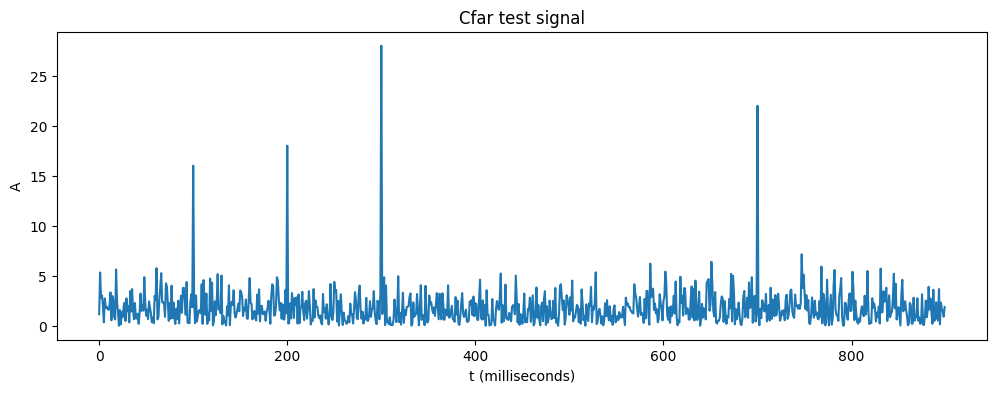

In [12]:
plt.figure(figsize=(12,4))
plt.plot(1000*t[:900], X_cfar[:900]) 
plt.title("Cfar test signal")
plt.xlabel("t (milliseconds)")
plt.ylabel("A")

In [34]:
# Apply CFAR to detect the targets by filtering the noise 

# CFAR Parameters 
Ns = len(X_cfar)
T = 12 # Number of training cells 
G = 4  # Number of Guard cells 
offset = 7  # Threshold offset to control SNR 

In [ ]:
# Initialize threshold and signal vectors 
threshold_cfar =  np.zeros(Ns - (G+T+1))
signal_cfar = np.zeros(Ns - (G+T+1))

In [36]:
# Slide the window across the signal 
for i in range(T+G+1, Ns):
    # Use lagging cells only for training 
    start = i- G - T
    end = i - G
    training_Cells = X_cfar[start:end]

    # Calculate the noise thresholding from training cells 
    noise_level = np.mean(training_Cells)
    threshold =  noise_level *offset

    # Store threshold  
    threshold_cfar[i - (G+T+1)] = threshold

    # cell under Test(CUT)
    signal =  X_cfar[i]
    if signal>threshold: 
        signal_cfar[i - (G+T+1)] = signal
    else: 
        signal_cfar[i - (G+T+1)] = 0


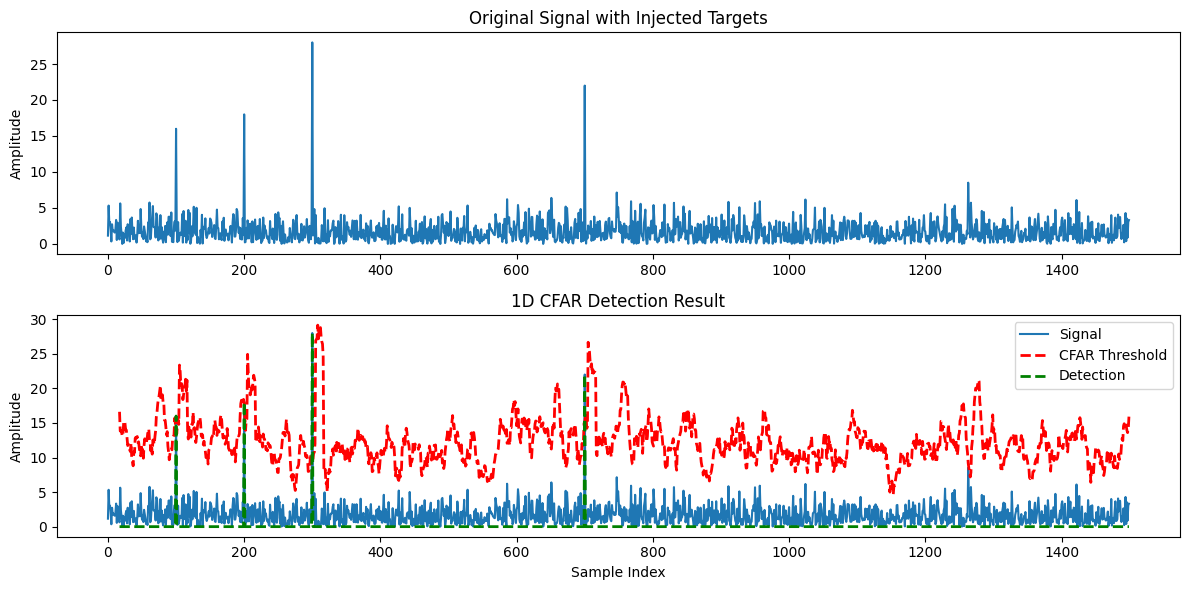

In [37]:
# === Plotting ===
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(X_cfar)
plt.title('Original Signal with Injected Targets')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(X_cfar, label='Signal')
plt.plot(np.arange(G + T + 1, Ns), threshold_cfar, 'r--', linewidth=2, label='CFAR Threshold')
plt.plot(np.arange(G + T + 1, Ns), signal_cfar, 'g--', linewidth=2, label='Detection')
plt.title('1D CFAR Detection Result')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()